In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [9]:
df = pd.read_csv("creditcard.csv")  # Change path if needed
print("Dataset shape:", df.shape)


Dataset shape: (284807, 31)


In [10]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    284315
1       492
Name: count, dtype: int64


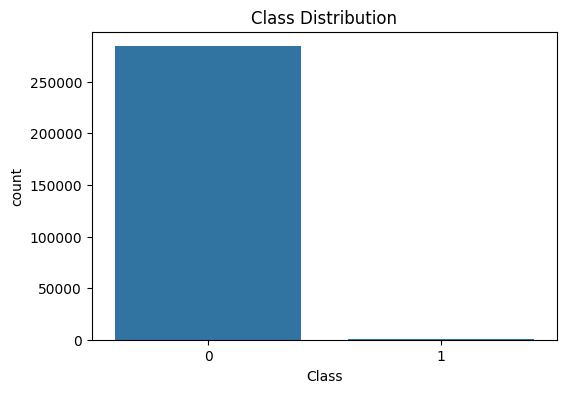

In [11]:
print(df['Class'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [12]:
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [13]:
X = df.drop('Class', axis=1)  
y = df['Class'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:,1]

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9994908886626171

Confusion Matrix:
 [[56852    12]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9684509513569075


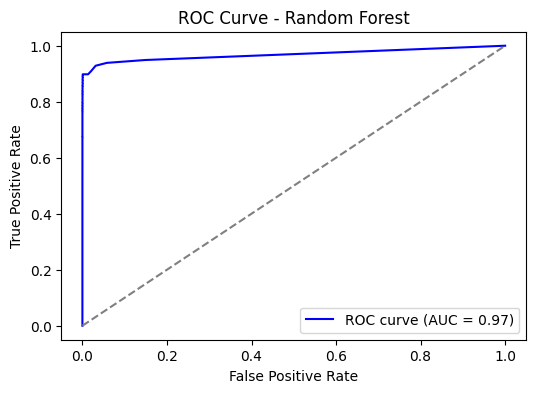

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

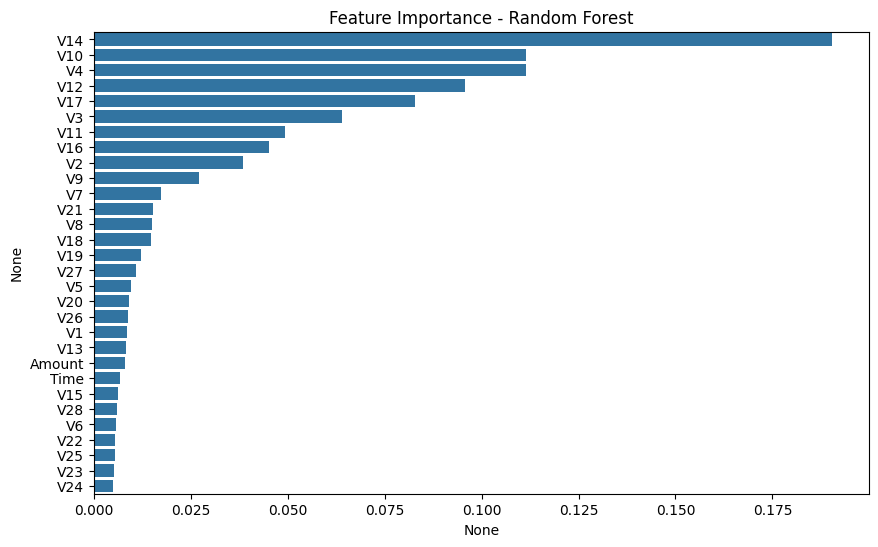

In [21]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()

In [22]:
df_test = X_test.copy()
df_test['Actual_Class'] = y_test.values
df_test['Predicted_Class'] = y_pred
predicted_fraud = df_test[df_test['Predicted_Class'] == 1]
print("Number of predicted fraud transactions:", predicted_fraud.shape[0])
predicted_fraud.head()

Number of predicted fraud transactions: 93


Time         V1         V2         V3        V4         V5  \
190263  128759.0  -1.272117   1.827615  -3.810610  0.583759  -0.641242   
77348    57007.0  -1.271244   2.462675  -2.851395  2.324480  -1.372245   
102442   68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
14920    26217.0 -17.950631  11.067069 -20.742660  6.075531 -13.389765   
153457   99129.0  -3.141115   2.014154  -0.610409  5.946659  -1.868534   

              V6         V7         V8        V9  ...       V22       V23  \
190263 -1.389043  -1.954054   1.173920 -2.053191  ...  0.858775  0.083079   
77348  -0.948196  -3.065234   1.166927 -2.268771  ...  0.081931 -0.221348   
102442  5.760059 -18.750889 -37.353443 -0.391540  ... -8.887017  5.303607   
14920  -4.532888 -15.188146  12.101062 -4.026880  ... -1.275675 -0.705046   
153457  0.756737  -3.313842   0.227978 -0.937894  ...  0.800389  0.514926   

             V24       V25       V26       V27       V28  Amount  \
190263  0.741676 -0.173234  0.534870  0.183562  0.020316    0.76   
77348  -0.523582  0.224228  0.756335  0.632800  0.250187    0.01   
102442 -0.639435  0.263203 -0.108877  1.269566  0.939407    1.00   
14920   0.102040  1.177477 -0.238730  1.554463  0.547948    1.00   
153457 -0.049373 -0.510364  0.442583 -0.165737  0.682784   45.51   

        Actual_Class  Predicted_Class  
190263             0                1  
77348              1                1  
102442             1                1  
14920              0                1  
153457             0                1  

[5 rows x 32 columns]

In [25]:
comparison = pd.crosstab(df_test['Actual_Class'], df_test['Predicted_Class'])
print("\nActual vs Predicted Fraud Table:\n", comparison)


Actual vs Predicted Fraud Table:
 Predicted_Class      0   1
Actual_Class              
0                56852  12
1                   17  81


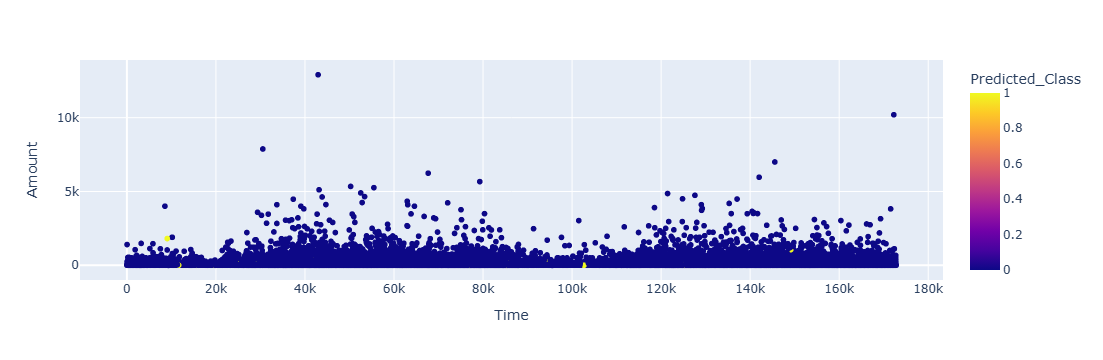

In [29]:
import plotly.express as px
fig = px.scatter(df_test, x='Time', y='Amount', color='Predicted_Class', hover_data=['Amount','Predicted_Class','Actual_Class'])
fig.show()


Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64
Accuracy: 0.9991924440855307

Confusion Matrix:
 [[56829    35]
 [   11    87]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.89      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9684509513569075


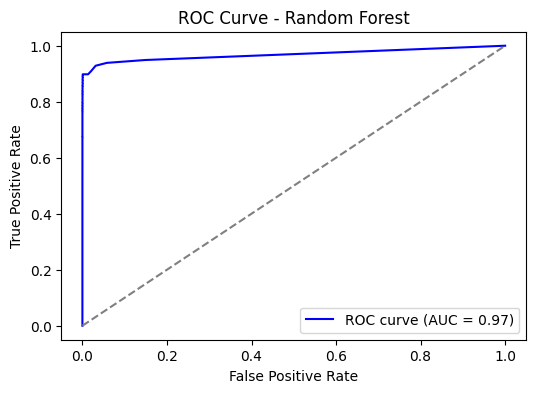

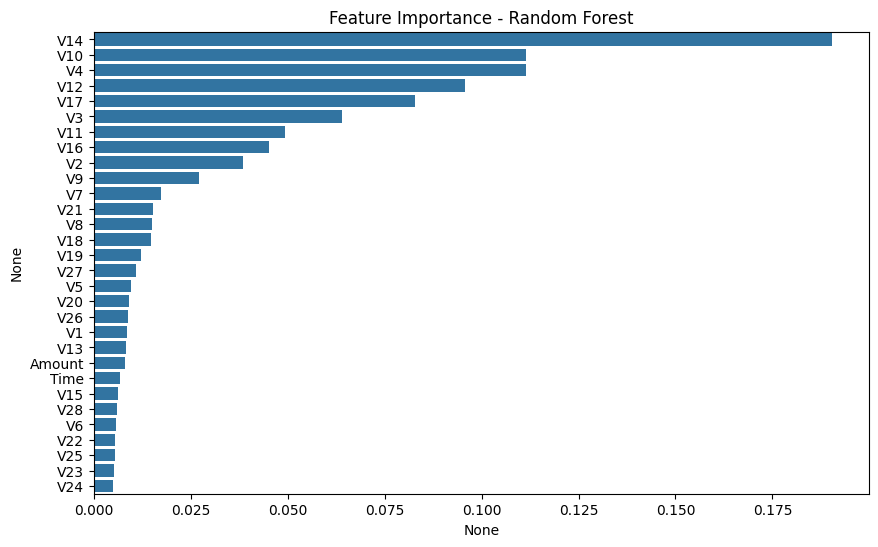

Number of predicted fraud transactions: 122


In [27]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# 2️⃣ Load Dataset
df = pd.read_csv("creditcard.csv")
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())  # Check imbalance

# 3️⃣ Split Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# 4️⃣ Train/Test Split (Stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Handle Imbalanced Data with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())

# 7️⃣ Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# 8️⃣ Make Predictions with Adjusted Threshold
y_proba = rf.predict_proba(X_test_scaled)[:,1]

# Adjust threshold to 0.3 to catch more frauds
threshold = 0.3
y_pred = (y_proba > threshold).astype(int)

# 9️⃣ Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# 1️⃣0️⃣ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# 1️⃣1️⃣ Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# 1️⃣2️⃣ Extract Predicted Fraud Transactions
df_test = X_test.copy()
df_test['Actual_Class'] = y_test.values
df_test['Predicted_Class'] = y_pred
predicted_fraud = df_test[df_test['Predicted_Class'] == 1]
print("Number of predicted fraud transactions:", predicted_fraud.shape[0])
predicted_fraud.head()

# Optional: Save Predicted Fraud to CSV
predicted_fraud.to_csv("predicted_fraud_transactions.csv", index=False)


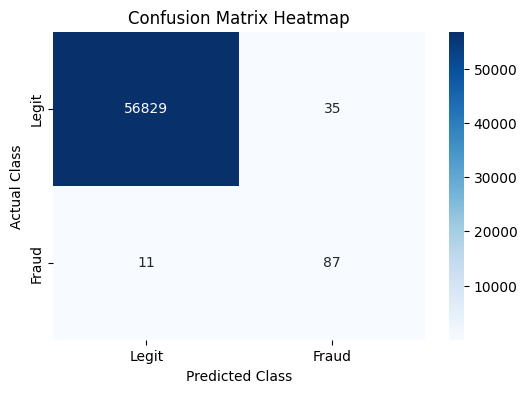

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix Heatmap")
plt.show()
